In [11]:
# import preprocess as prep
import SLR_model
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import os
import json
import importlib
from matplotlib import pyplot as plt
import preprocess
from preprocess import person

# model will output multiple(15) results/sec, how are we gonna handle it?

In [12]:
 # reload model file
importlib.reload(SLR_model)
importlib.reload(preprocess)

<module 'preprocess' from 'C:\\Users\\shd\\Documents\\capstone\\BomNae-SLR\\preprocess.py'>

In [14]:
# Configurations
load_size = 256 # number of data to be loaded at once
epochs = 10
batch_size = 16
save_dir = "saves"
load_dir = "saves"
# load_path = "C:/Users/jerry/Desktop/hly/2024-2/cap/BN_SLR/BomNae-SLR/checkpoints.keras"


In [23]:
model = SLR_model.get_model()

In [21]:
# hand input shape: (batch, time, h, w, channels)
# pose input shape: (batch, time, channel, features)

In [24]:
# # 세이브된 모델 로드
# load_path = os.join(load_dir, "check_00-00-00.keras")
# model = SLR_model.load_model(load_path)

In [1]:
# # 안될때 (강제중지 + 초기화)
# tf.keras.backend.clear_session()

In [ ]:
l_raws=[]
r_raws=[]
p_raws=[]
y_raws=[]


save_suffix = time.strftime("_%d-%H-%M", time.localtime(time.time()))
check_path = os.path.join(save_dir, "check"+save_suffix)
hist_path = os.path.join(save_dir, "hist"+save_suffix+".json")

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=f'{check_path}.keras',
    monitor='binary_accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)



l_raw, r_raw, p_raw, y_raw = preprocess.load_data(f"1/1")

l_raws.append(l_raw)
r_raws.append(r_raw)
p_raws.append(p_raw)
y_raws.append(y_raw)


l_train, each = SLR_model.serialize(l_raws)
r_train, each = SLR_model.serialize(r_raws)
p_train, each = SLR_model.serialize(p_raws, stride=2)
y_train = np.repeat(y_raws, each)
y_train = SLR_model.num_arr2bin(y_train, 12)
x_train = (l_train, r_train, p_train)

dataset = SLR_model.convert_to_dataset(x_train, y_train, batch_size)
hist = model.fit(dataset, epochs=epochs, callbacks=[model_checkpoint_callback])

with open(hist_path, 'w') as file:
    json.dump(hist.history, file)


In [26]:
hist = model.fit(x_train, y_train, epochs=epochs, batch_size= batch_size, callbacks=[model_checkpoint_callback])

In [36]:
 # reload model file
importlib.reload(SLR_model)
importlib.reload(preprocess)
end_file=preprocess.getoutputdir()

save_suffix = time.strftime("_%d-%H-%M", time.localtime(time.time()))
check_path = os.path.join(save_dir, "check"+save_suffix)
hist_path = os.path.join(save_dir, "hist"+save_suffix+".json")

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=f'{check_path}.keras',
    monitor='binary_accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)


for i in range(1,17):
    load_size_j=load_size
    l_raws=[]
    r_raws=[]
    p_raws=[]
    y_raws=[]
    count=0
    start_word=" "
    
    for j in os.listdir(os.path.join(preprocess.getoutputdir(),str(i))):
        l_raw, r_raw, p_raw, y_raw = preprocess.load_data(f"{i}/{j}")
        
        l_raws.append(l_raw)
        r_raws.append(r_raw)
        p_raws.append(p_raw)
        y_raws.append(y_raw)
        if count==0:
            start_word = j
        else:
            end_word = j
        if count>=load_size:
            print(f"person:{i} : {start_word} ~ {end_word}")
            l_train, each = SLR_model.serialize(l_raws)
            r_train, each = SLR_model.serialize(r_raws)
            p_train, each = SLR_model.serialize(p_raws, stride=2)
            y_train = np.repeat(y_raws, each)
            y_train = SLR_model.num_arr2bin(y_train, 12)
            x_train = (l_train, r_train, p_train)
        
            dataset = SLR_model.convert_to_dataset(x_train, y_train, batch_size)
            hist = model.fit(dataset, epochs=epochs, callbacks=[model_checkpoint_callback])
            
            with open(hist_path, 'w') as file:
                json.dump(hist.history, file)
            count=0
            l_raws.clear()
            r_raws.clear()
            p_raws.clear()
            y_raws.clear()
        else:
            count+=1
    if len(l_raws)>0:
        l_train, each = SLR_model.serialize(l_raws)
        r_train, each = SLR_model.serialize(r_raws)
        p_train, each = SLR_model.serialize(p_raws, stride=2)
        y_train = np.repeat(y_raws, each)
        y_train = SLR_model.num_arr2bin(y_train, 12)
        x_train = (l_train, r_train, p_train)
    
        dataset = SLR_model.convert_to_dataset(x_train, y_train, batch_size)
        hist = model.fit(dataset, epochs=epochs, callbacks=[model_checkpoint_callback])
        
        with open(hist_path, 'w') as file:
            json.dump(hist.history, file)

    

person:1 : 1.npz ~ 1229.npz
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6638 - loss: 0.5771
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7072 - loss: 0.5253
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7186 - loss: 0.5117
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7239 - loss: 0.5028
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7290 - loss: 0.4959
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7335 - loss: 0.4902
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7378 - loss: 0.4847
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7421 - loss: 0.4799
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7451 - loss: 0.4752
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7483 - loss: 0.4706
person:1 : 123.npz ~ 1460.npz
Epoch 1/10


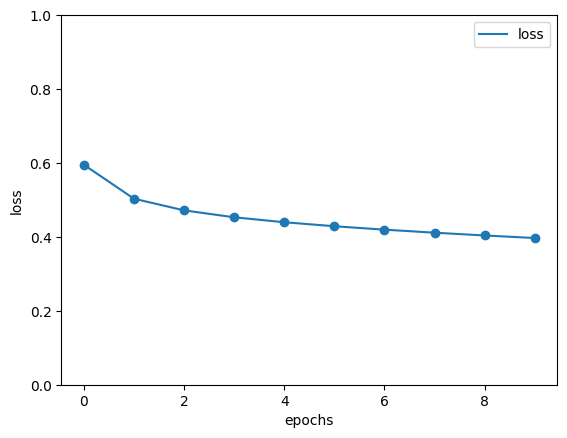

In [37]:
plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.scatter(range(len(hist.history['loss'])), hist.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss"])
plt.ylim((0,1))
plt.show()

In [84]:
# importlib.reload(SLR_model)
# model = SLR_model.get_model()

In [85]:
# pred = model.predict(x_dummy, batch_size=1)

In [12]:
eval_res = model.evaluate(x_train, y_train, batch_size= batch_size)

ValueError: Exception encountered when calling HandModel.call().

[1mas_list() is not defined on an unknown TensorShape.[0m

Arguments received by HandModel.call():
  • x=tf.Tensor(shape=(None, 63, 4, 5, 3), dtype=float32)
  • training=False

In [13]:
print(eval_res)

NameError: name 'eval_res' is not defined

In [14]:
model.metrics_names

['loss', 'compile_metrics']

In [15]:
# # dummy x_raw data
# l_raw = []
# duration_list = []
# for i in range(load_size):
#     h_elem = np.zeros(shape=(4,5,3))
#     # p_elem = np.zeros(shape=(3,10))
#     # comb_elem = [h_elem, h_elem, p_elem]
#     x_elem = []
#     duration = (np.random.randint(70,91))
#     duration_list.append(duration)
#     for j in range(duration): # frame size
#         x_elem.append(h_elem)
#         # x_elem.append(comb_elem)
#     l_raw.append(x_elem)
# r_raw = []
# for i in range(load_size):
#     h_elem = np.zeros(shape=(4,5,3))
#     # p_elem = np.zeros(shape=(3,10))
#     # comb_elem = [h_elem, h_elem, p_elem]
#     x_elem = []
#     duration = duration_list[i]
#     for j in range(duration): # frame size
#         x_elem.append(h_elem)
#         # x_elem.append(comb_elem)
#     r_raw.append(x_elem)
# p_raw = []
# for i in range(load_size):
#     # h_elem = np.zeros(shape=(4,5,3))
#     p_elem = np.zeros(shape=(3,10))
#     # comb_elem = [h_elem, h_elem, p_elem]
#     x_elem = []
#     duration = duration_list[i]
#     for j in range(duration): # frame size
#         # x_elem.append(h_elem)
#         x_elem.append(p_elem)
#         # x_elem.append(comb_elem)
#     p_raw.append(x_elem)

# # dummy y_raw data
# # y_raw = np.random.randint(0,1024,load_size)
# y_raw = np.zeros(shape=(load_size,), dtype=np.int32)